In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn .manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

2.Loading the DATA

In [4]:
train=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test.csv")


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,...,fBodyAccMag-std(),fBodyAccMag-mad(),fBodyAccMag-max(),fBodyAccMag-min(),fBodyAccMag-sma(),fBodyAccMag-energy(),fBodyAccMag-iqr(),fBodyAccMag-entropy(),fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,...,-0.956134,-0.948870,-0.974321,-0.925722,-0.952155,-0.998285,-0.973273,-0.646376,-0.793103,-0.088436,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [10]:
train.subject.value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

3.Data Preprocessing

In [12]:
print("Number of duplicates in train",sum(train.duplicated()))
print("Number of duplicates in test",sum(test.duplicated()))

Number of duplicates in train 0
Number of duplicates in test 0


In [13]:
print("Total number of missing values in train:",train.isna().values.sum())
print("Total number of missing values in test:",test.isna().values.sum())

Total number of missing values in train: 0
Total number of missing values in test: 0


3.c    Checking for class imbalance

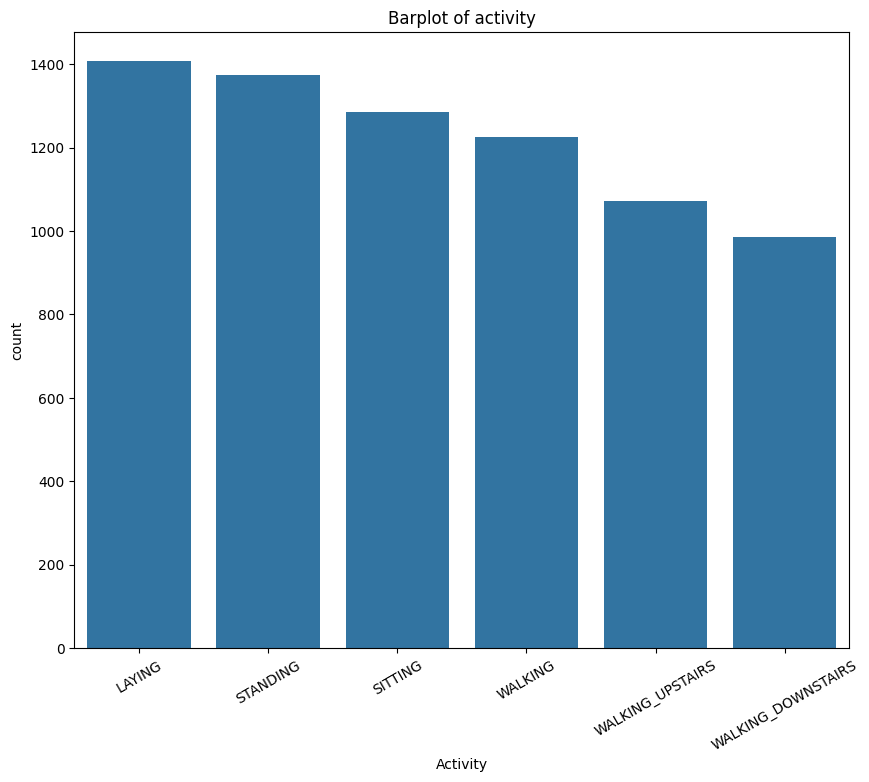

In [18]:
plt.figure(figsize=(10,8))
plt.title("Barplot of activity")
sns.countplot(x=train.Activity,order=train.Activity.value_counts().index)
plt.xticks(rotation=30)
plt.show()

## 4.Exploratory Data Analysis
what features are there?

In [24]:
pd.[col.split('-')[0].split('(')[0]  for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [27]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0]  for col in train.columns]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


## 4.a Analysing tBodyAccMag-mean feature

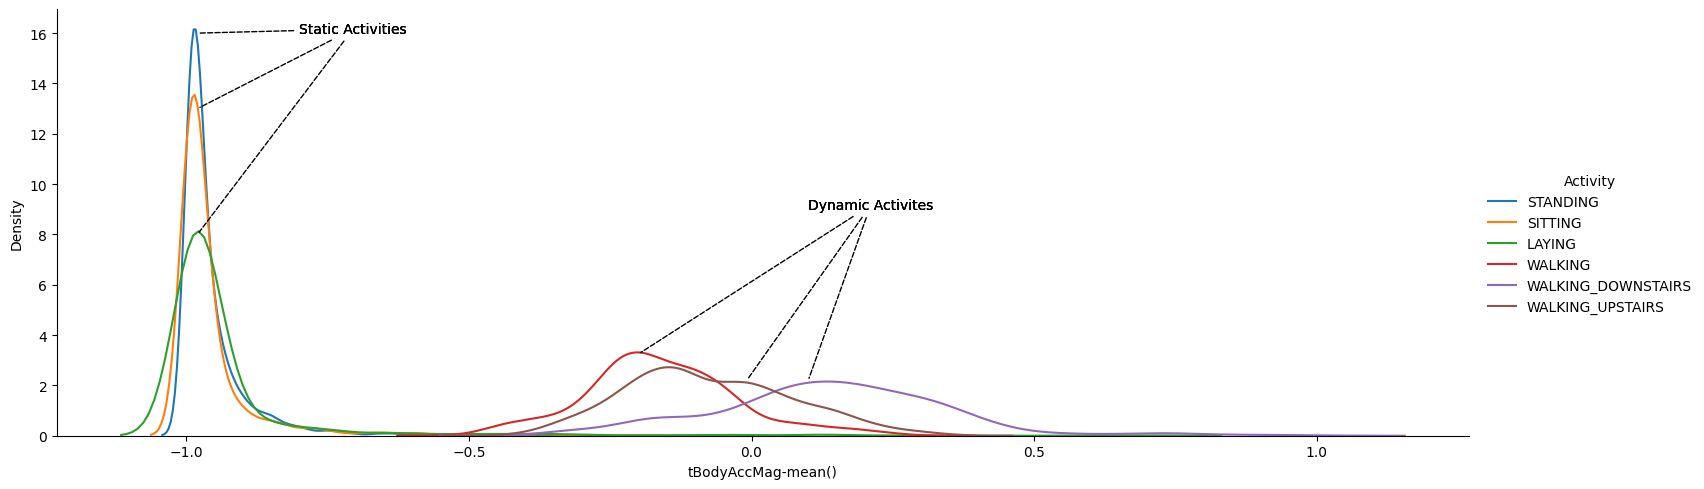

In [37]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()

plt.annotate('Static Activities',xy=(-.98,8),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,13),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})



plt.annotate("Dynamic Activites",xy=(-0.2,3.25),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activites",xy=(0.1,2.18),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activites",xy=(-0.01,2.15),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.show()

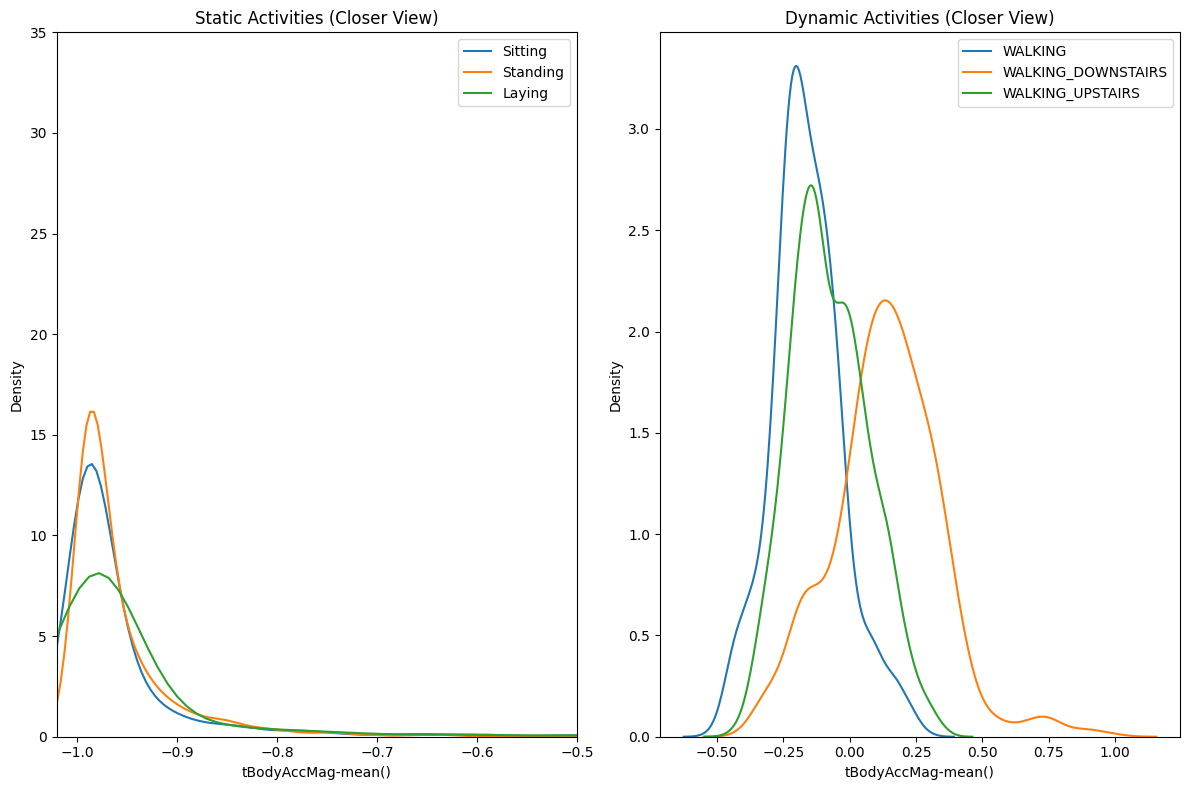

In [42]:


plt.figure(figsize=(12, 8))

# Left subplot for static activities
plt.subplot(1, 2, 1)
plt.title("Static Activities (Closer View)")
sns.kdeplot(train[train['Activity'] == "SITTING"]['tBodyAccMag-mean()'], label='Sitting')
sns.kdeplot(train[train['Activity'] == "STANDING"]['tBodyAccMag-mean()'], label='Standing')
sns.kdeplot(train[train['Activity'] == "LAYING"]['tBodyAccMag-mean()'], label='Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.legend()

# Right subplot for dynamic activities
plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (Closer View)")
sns.kdeplot(train[train['Activity'] == "WALKING"]['tBodyAccMag-mean()'], label='WALKING')
sns.kdeplot(train[train['Activity'] == "WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'], label='WALKING_DOWNSTAIRS')
sns.kdeplot(train[train['Activity'] == "WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], label='WALKING_UPSTAIRS')
plt.legend()

plt.tight_layout()
plt.show()


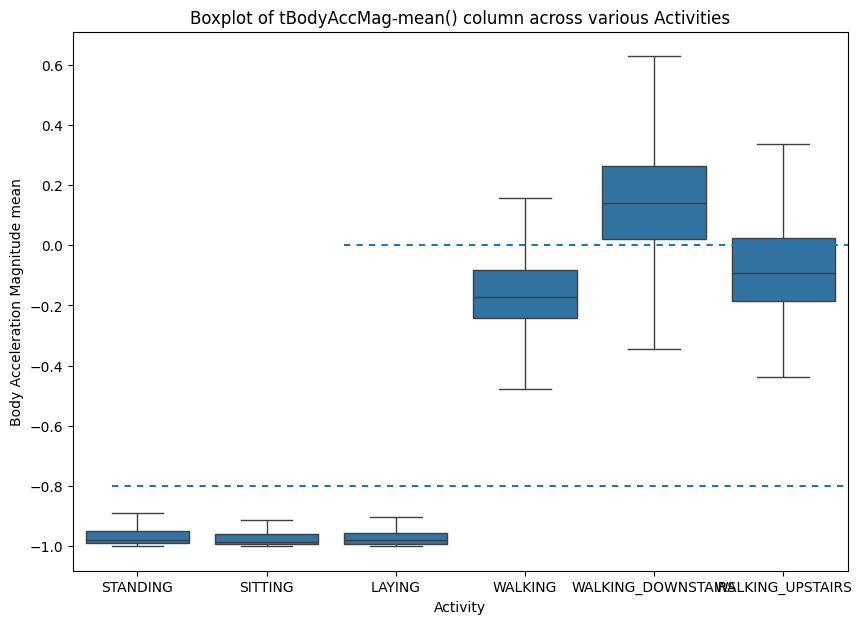

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various Activities")
plt.axhline(y=-0.8,xmin=0.05,dashes=(3,3))
plt.axhline(y=0.0,xmin=0.35,dashes=(3,3))
plt.show()

Analysing Angle between X-axis and gravityMean feature

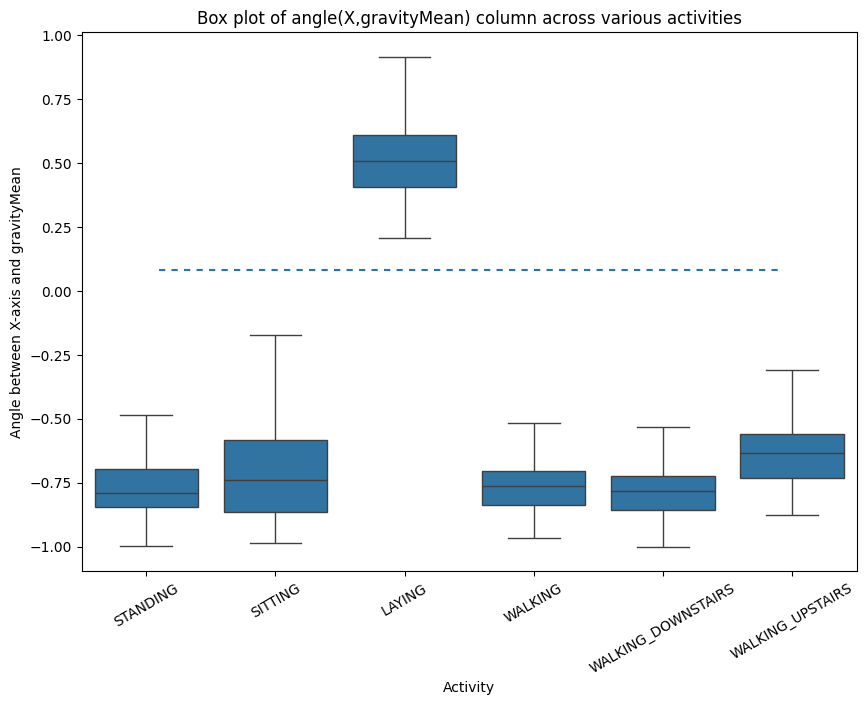

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

4.c Analysing Angle between Y-axis and gravityMean feature

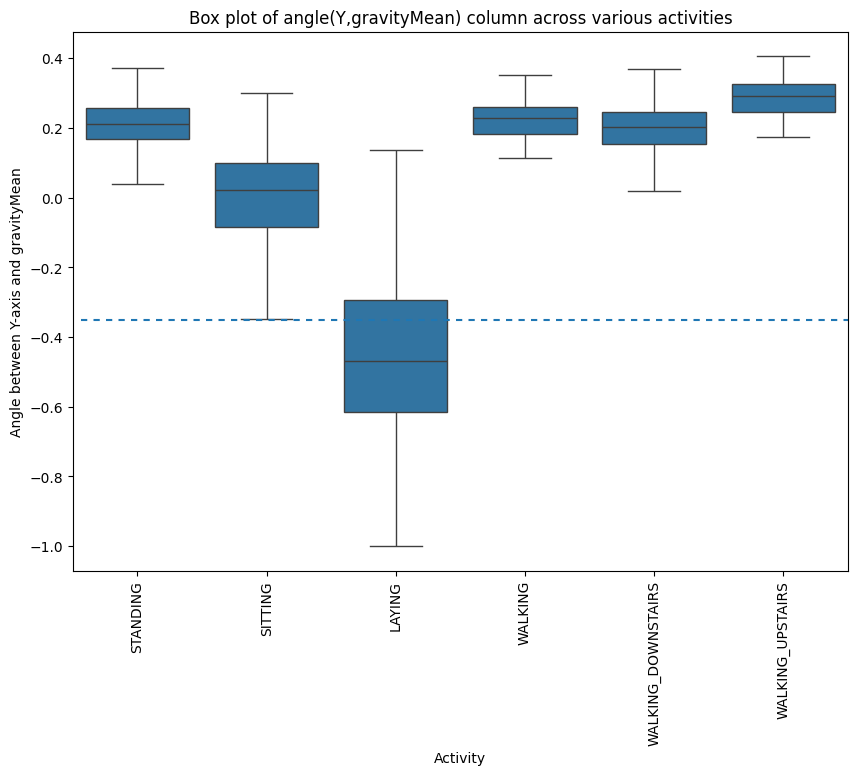

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

4.d Visualizing data using PCA

In [47]:

x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)


In [48]:

pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

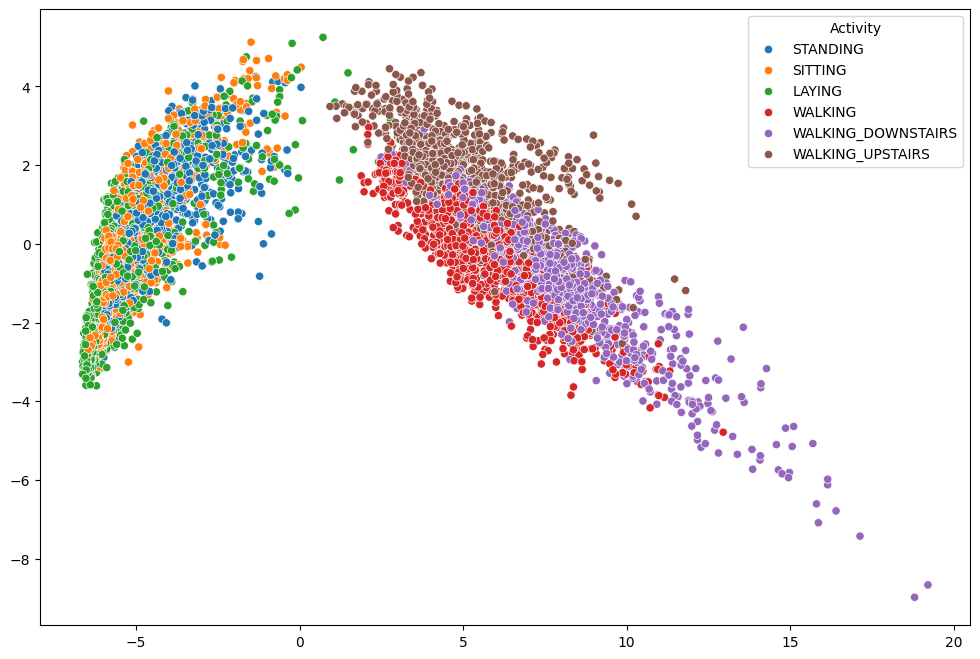

In [49]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

4.d Visualizing data using t-SNE


In [50]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [51]:

tsne

array([[ -7.0803103,  62.957546 ],
       [-20.27942  ,  13.787592 ],
       [-26.866488 ,  20.040604 ],
       ...,
       [ 22.948544 ,  59.736523 ],
       [ 22.927933 ,  59.480255 ],
       [ 23.405052 ,  58.696873 ]], dtype=float32)

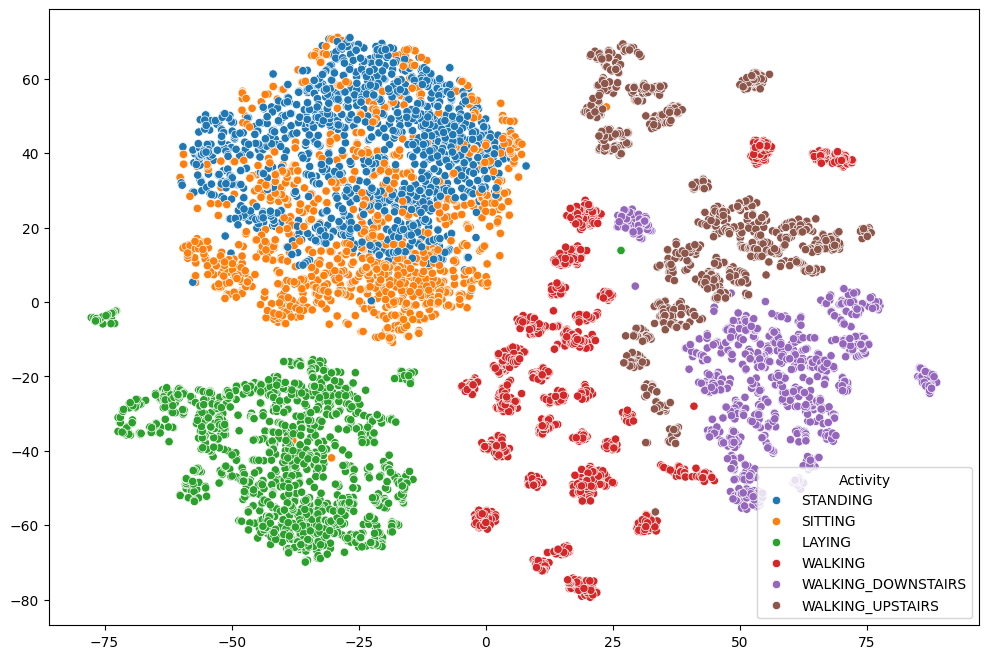

In [52]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

## 5.ML models

# Getting training and test data ready

In [55]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [56]:
print('Test data size : ', X_test.shape)

Test data size :  (999, 561)


5.a Logistic regression model with Hyperparameter tuning and cross validation

In [57]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [58]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.954954954954955


In [59]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [60]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   9, 169,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

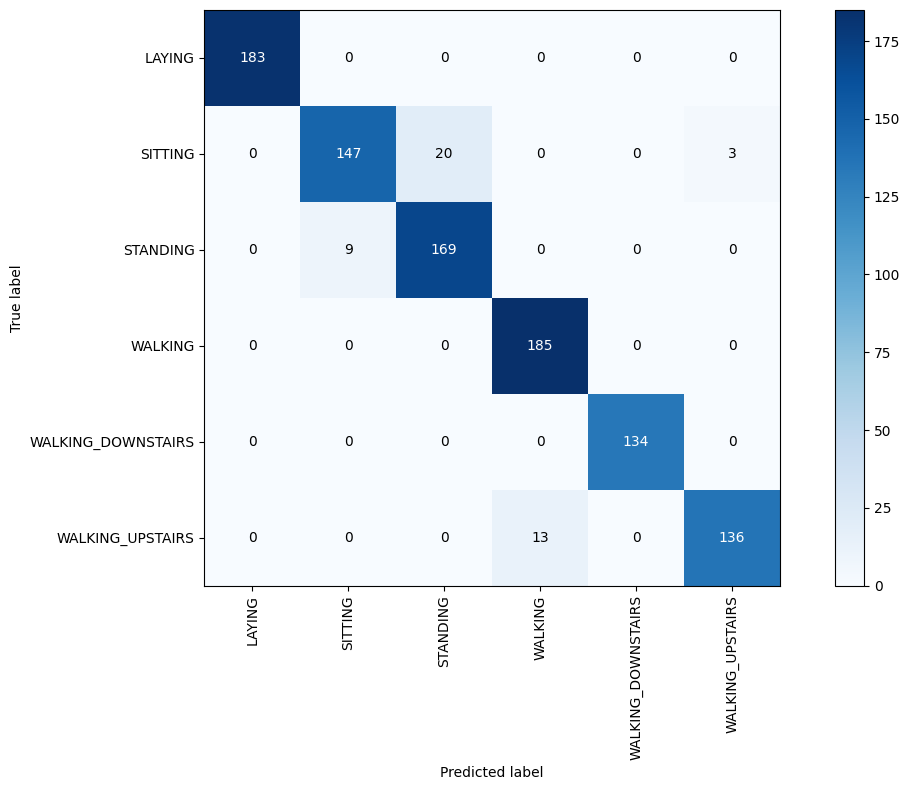

In [61]:
cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [62]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    #print("Best score : ", model.best_score_)

In [63]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


5.b Kernel SVM model with Hyperparameter tuning and cross validation

In [64]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [65]:
y_pred = svm_rs.predict(X_test)

In [66]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.965965965965966


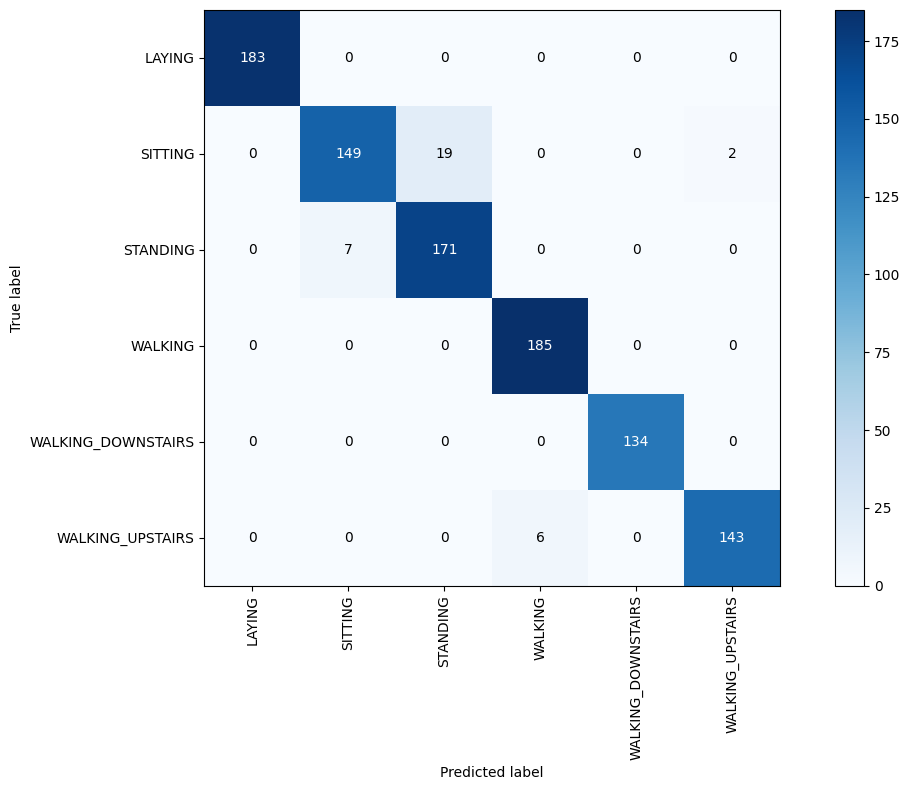

In [67]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [68]:
get_best_randomsearch_results(svm_rs)


Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


5.c Decision tree model with Hyperparameter tuning and cross validation

In [69]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [70]:
y_pred = dt_classifier_rs.predict(X_test)

In [71]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8528528528528528


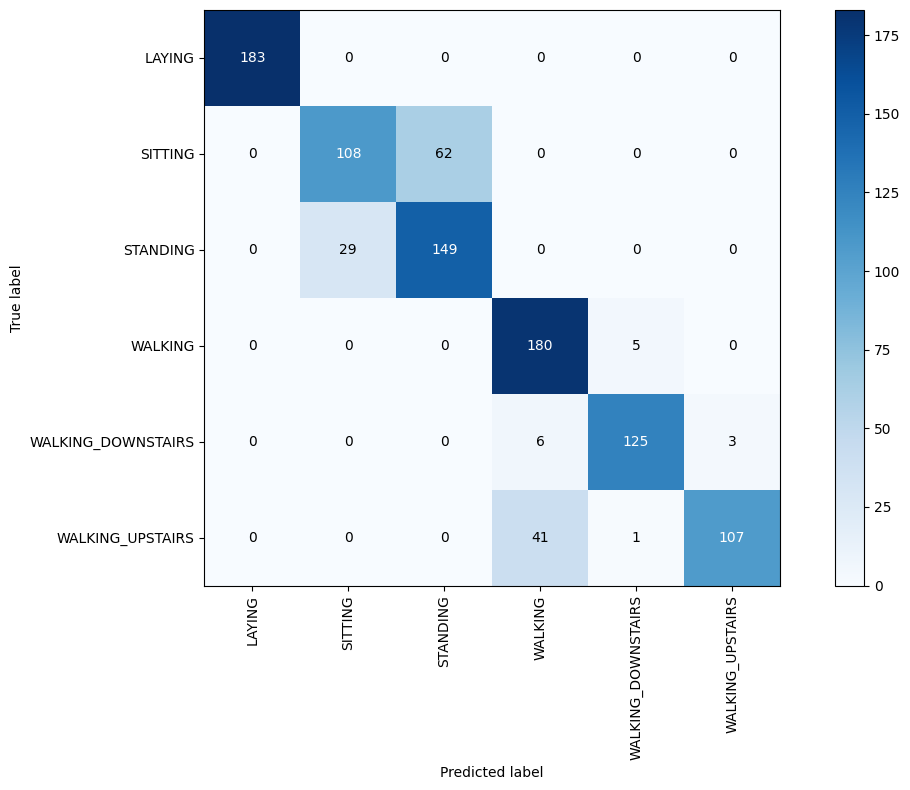

In [72]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [73]:

# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


5.d Random forest model with Hyperparameter tuning and cross validation

In [74]:

parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [75]:

# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}


In [76]:
y_pred = rf_classifier_rs.predict(X_test)

In [77]:

rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9039039039039038


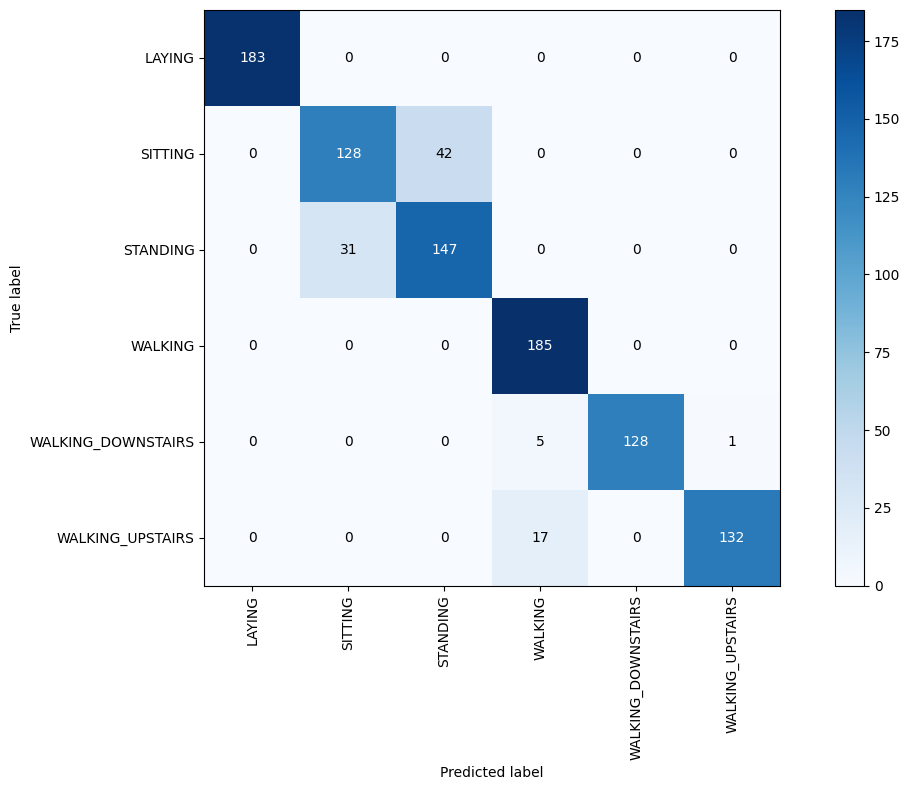

In [78]:

cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))